# Preparing for the Practicals

#### Linear Search and Time Complexity Analysis

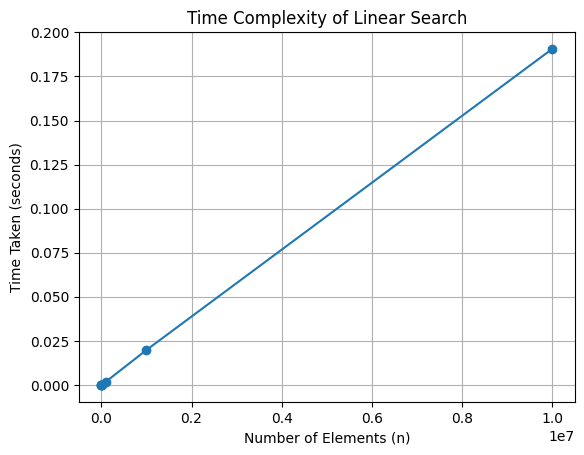

In [17]:
import matplotlib.pyplot as plt
import time

def linear_search(arr, n):
    for i in range(len(arr)):
        if arr[i] == n:
            return i
    return -1

def time_analysis():
    arr = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
    times = []
    target = -1

    for i in arr:
        array = list(range(i))
        start_time = time.time()
        linear_search(array, target)
        end_time = time.time()
        times.append(end_time - start_time)

    plt.plot(arr, times, marker='o')
    plt.xlabel('Number of Elements (n)')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Complexity of Linear Search')
    plt.grid()
    plt.show()

time_analysis()

###  Find All Occurrences of a Pattern in Text

In [23]:
def search_pat(pat, txt):
    tl = len(txt)
    pl = len(pat)
    occur = []
    for i in range(tl-pl+1):
        if txt[i:i+pl] == pat:
            occur.append(i)
    return occur

txt = "ABCDABCDABCDABCDABCD"
pat = "ABCD"
res = search_pat(pat, txt)
print(res)

[0, 4, 8, 12, 16]


### Breadth First Search (BFS)

In [27]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    result = []
    while queue:
        node = queue.popleft();
        if node not in visited:
            visited.add(node)
            result.append(node)
            queue.extend(graph[node] - visited)
    return result

graph = {
    'A': {'B', 'C'},
    'B': {'A', 'D', 'E'},
    'C': {'A', 'F'},
    'D': {'B'},
    'E': {'B', 'F'},
    'F': {'C', 'E'}
}
print(bfs(graph, 'A'))

['A', 'B', 'C', 'D', 'E', 'F']


### Depth First Search (DFS)

In [30]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited=set()
    visited.add(start)
    result = [start]
    for next_node in graph[start]-visited:
        result.extend(dfs(graph, next_node, visited))
    return result
graph = {
    'A': {'B', 'C'},
    'B': {'A', 'D', 'E'},
    'C': {'A', 'F'},
    'D': {'B'},
    'E': {'B', 'F'},
    'F': {'C', 'E'}
}
print(dfs(graph, 'A'))

['A', 'B', 'D', 'E', 'F', 'C', 'C']


### Minimum Cost Spanning Tree using Prim's Algorithm

In [33]:
import heapq

def prims(graph, start):
    mst = []
    visited = set([start])
    edges = [(cost, start, to) for to, cost in graph[start]]
    heapq.heapify(edges)
    while edges:
        cost, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst.append((frm, to, cost))
            for next_to, next_cost in graph[to]:
                if next_to not in visited:
                    heapq.heappush(edges, (next_cost, to, next_to))
    return mst

graph = {
    'A': [('B', 1), ('C', 3)],
    'B': [('A', 1), ('C', 3), ('D', 6)],
    'C': [('A', 3), ('B', 3), ('D', 4)],
    'D': [('B', 6), ('C', 4)]
}
print(prims(graph, 'A'))

[('A', 'B', 1), ('A', 'C', 3), ('C', 'D', 4)]


### Floyd's Algorithm for All-Pairs Shortest Paths

In [35]:
def floyd_warshall(graph):
    dist = list(map(lambda i: list(map(lambda j: j, i)), graph))
    n = len(graph)

    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k]+dist[k][j])
    
    return dist

graph = [
    [0, 3, float('inf'), 7],
    [8, 0, 2, float('inf')],
    [5, float('inf'), 0, 1],
    [2, float('inf'), float('inf'), 0]
]
print(floyd_warshall(graph))

[[0, 3, 5, 6], [5, 0, 2, 3], [3, 6, 0, 1], [2, 5, 7, 0]]


### Find Maximum and Minimum using Divide and Conquer

In [37]:
def find_min_and_max(arr, low, high):
    if low == high:
        return arr[low], arr[low]

    if low+1 == high:
        return min(arr[low], arr[high]), max(arr[low], arr[high])

    mid = (low+high)//2
    min1, max1 = find_min_and_max(arr, low, mid)
    min2, max2 = find_min_and_max(arr, mid+1, high)

    return min(min1, min2), max(max1, max2)

arr = [3, 5, 1, 9, 2, 8, 4]
print(find_min_and_max(arr, 0, len(arr) - 1))

(1, 9)


### Binary Search

In [38]:
def binary_search(arr, target):
    left, right = 0, len(arr) - 1

    while left <= right:
        mid = (left + right) // 2

        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return -1

# Example usage
arr = [1, 3, 5, 7, 9, 11]
target = 5
print(binary_search(arr, target))

2


### Quick Sort

In [46]:
def quick(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    l = [x for x in arr if x<pivot]
    m = [x for x in arr if x==pivot]
    r = [x for x in arr if x>pivot]
    return quick(l) + m + quick(r)
arr = [3, 6, 8, 10, 1, 2, 1]
print(quick(arr)) 

[1, 1, 2, 3, 6, 8, 10]


### Merge Sort

In [51]:
def merge_sort(arr):
    if len(arr)<=1:
        return arr
    mid = len(arr)//2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    res = []
    i=j=0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            res.append(left[i])
            i += 1
        else:
            res.append(right[j])
            j += 1

    res.extend(left[i:])
    res.extend(right[j:])
    return res

arr = [3, 6, 8, 10, 1, 2, 1]
print(merge_sort(arr))

[1, 1, 2, 3, 6, 8, 10]


### Insertion Sort

In [57]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j>=0 and arr[j]>key:
            arr[j+1] = arr[j]
            j-=1
        arr[j+1]=key
arr = [3, 6, 8, 10, 1, 2, 1]
insertion_sort(arr)
print(arr)

[1, 1, 2, 3, 6, 8, 10]


### Counting Sort

In [59]:
def counting_sort(arr):
    max_val = max(arr)
    count = [0] * (max_val + 1)

    for num in arr:
        count[num] += 1
    print(count)
    sorted_arr = []
    for i in range(len(count)):
        sorted_arr.extend([i] * count[i])

    return sorted_arr

# Example usage
arr = [3, 6, 8, 10, 1, 2, 1]
print(counting_sort(arr))

[0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1]
[1, 1, 2, 3, 6, 8, 10]
